In [1373]:
#!pip install tensorflow

In [1381]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import datetime as dt
from datetime import timedelta
from  matplotlib import pyplot as plt
plt.style.use =('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout


In [1382]:
company = 'AAPL'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,1,1)
df = web.DataReader(company, 'yahoo', start, end)

In [1383]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575913
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783866
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018


In [1384]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-17,173.470001,169.690002,169.929993,171.139999,195432700.0,170.922241
2021-12-20,170.580002,167.460007,168.279999,169.750000,107499100.0,169.533997
2021-12-21,173.199997,169.119995,171.559998,172.990005,91185900.0,172.769882
2021-12-22,175.860001,172.149994,173.039993,175.639999,92135300.0,175.416504
2021-12-23,176.850006,175.270004,175.850006,176.279999,68356600.0,176.055695
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251


In [1385]:
df.shape

(2517, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

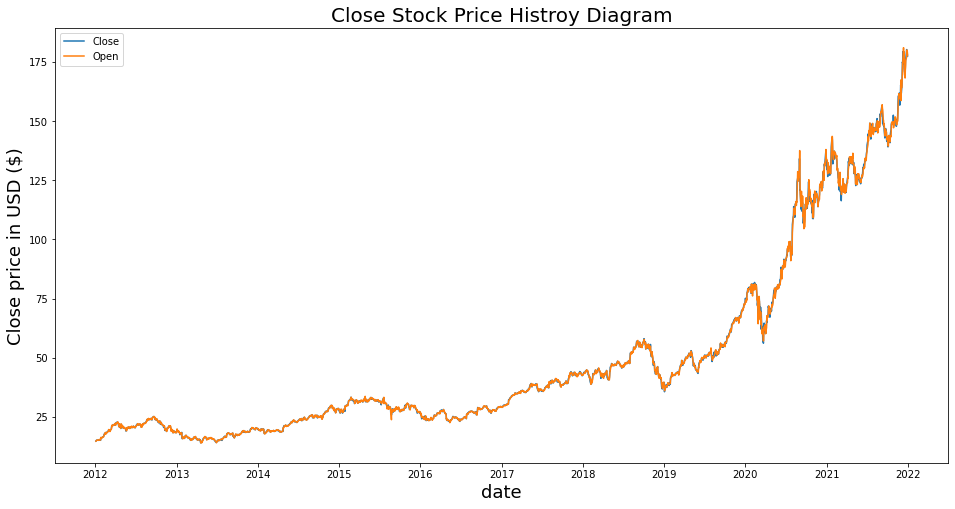

In [1386]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.legend(['Close','Open'], loc='upper left')
plt.xlabel('date', fontsize=18)
plt.title('Close Stock Price Histroy Diagram', fontsize=20)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.show

In [1387]:
df.shape

(2517, 6)

In [1388]:
#scalling the data / converting data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [1389]:
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [1390]:
#spliting data into trainset and test set
prediction_days = 60
x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])
    if i<=prediction_days:
        print(x_train)
        print(y_train)

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]


In [1391]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [1392]:
x_train.shape, y_train.shape

((2457, 60), (2457,))

In [1393]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [1394]:
x_train.shape


(2457, 60, 1)

In [1395]:
#building the model
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(1))

In [1396]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [1397]:
model.fit(x_train, y_train ,batch_size=32 , epochs=300)

Epoch 1/300
77/77 [==============================] - 49s 153ms/step - loss: 0.0073
Epoch 2/300
77/77 [==============================] - 10s 134ms/step - loss: 0.0020
Epoch 3/300
77/77 [==============================] - 10s 127ms/step - loss: 0.0018
Epoch 4/300
77/77 [==============================] - 10s 132ms/step - loss: 0.0014
Epoch 5/300
77/77 [==============================] - 12s 156ms/step - loss: 0.0013
Epoch 6/300
77/77 [==============================] - 12s 154ms/step - loss: 0.0014
Epoch 7/300
77/77 [==============================] - 12s 150ms/step - loss: 0.0014
Epoch 8/300
77/77 [==============================] - 11s 137ms/step - loss: 0.0014
Epoch 9/300
77/77 [==============================] - 10s 134ms/step - loss: 0.0013
Epoch 10/300
77/77 [==============================] - 11s 144ms/step - loss: 0.0012
Epoch 11/300
77/77 [==============================] - 10s 127ms/step - loss: 0.0014
Epoch 12/300
77/77 [==============================] - 10s 134ms/step - loss: 0.0012
E

77/77 [==============================] - 9s 112ms/step - loss: 5.8707e-04
Epoch 96/300
77/77 [==============================] - 9s 111ms/step - loss: 5.2087e-04
Epoch 97/300
77/77 [==============================] - 9s 111ms/step - loss: 5.3093e-04
Epoch 98/300
77/77 [==============================] - 9s 112ms/step - loss: 5.7019e-04
Epoch 99/300
77/77 [==============================] - 9s 111ms/step - loss: 5.8831e-04
Epoch 100/300
77/77 [==============================] - 9s 112ms/step - loss: 5.5247e-04
Epoch 101/300
77/77 [==============================] - 9s 110ms/step - loss: 5.4608e-04
Epoch 102/300
77/77 [==============================] - 9s 110ms/step - loss: 5.8537e-04
Epoch 103/300
77/77 [==============================] - 8s 110ms/step - loss: 5.4277e-04
Epoch 104/300
77/77 [==============================] - 9s 112ms/step - loss: 6.0251e-04
Epoch 105/300
77/77 [==============================] - 9s 113ms/step - loss: 5.4524e-04
Epoch 106/300
77/77 [=============================

Epoch 188/300
77/77 [==============================] - 9s 114ms/step - loss: 4.9339e-04
Epoch 189/300
77/77 [==============================] - 9s 113ms/step - loss: 5.0794e-04
Epoch 190/300
77/77 [==============================] - 9s 113ms/step - loss: 4.3299e-04
Epoch 191/300
77/77 [==============================] - 9s 113ms/step - loss: 5.5578e-04
Epoch 192/300
77/77 [==============================] - 9s 113ms/step - loss: 5.6592e-04
Epoch 193/300
77/77 [==============================] - 9s 114ms/step - loss: 4.5255e-04
Epoch 194/300
77/77 [==============================] - 9s 122ms/step - loss: 4.3457e-04
Epoch 195/300
77/77 [==============================] - 9s 116ms/step - loss: 4.7800e-04
Epoch 196/300
77/77 [==============================] - 9s 115ms/step - loss: 5.0941e-04
Epoch 197/300
77/77 [==============================] - 9s 116ms/step - loss: 4.3925e-04
Epoch 198/300
77/77 [==============================] - 9s 114ms/step - loss: 4.9982e-04
Epoch 199/300
77/77 [===========

77/77 [==============================] - 9s 119ms/step - loss: 4.5170e-04
Epoch 281/300
77/77 [==============================] - 9s 122ms/step - loss: 3.9923e-04
Epoch 282/300
77/77 [==============================] - 10s 130ms/step - loss: 4.3299e-04
Epoch 283/300
77/77 [==============================] - 10s 132ms/step - loss: 4.9584e-04
Epoch 284/300
77/77 [==============================] - 11s 144ms/step - loss: 4.6672e-04
Epoch 285/300
77/77 [==============================] - 10s 126ms/step - loss: 4.5538e-04
Epoch 286/300
77/77 [==============================] - 11s 137ms/step - loss: 5.0364e-04
Epoch 287/300
77/77 [==============================] - 10s 124ms/step - loss: 4.3230e-04
Epoch 288/300
77/77 [==============================] - 9s 120ms/step - loss: 4.6579e-04
Epoch 289/300
77/77 [==============================] - 10s 132ms/step - loss: 4.8235e-04
Epoch 290/300
77/77 [==============================] - 10s 135ms/step - loss: 5.1671e-04
Epoch 291/300
77/77 [=================

In [1398]:
# creating test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

actual_price = test_data['Close'].values
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)


In [1399]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [1400]:
x_test=[]

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i,0])


x_test = np.array(x_test)
x_test = np.reshape(x_test,( x_test.shape[0], x_test.shape[1],1))


In [1401]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

<function matplotlib.pyplot.show(close=None, block=None)>

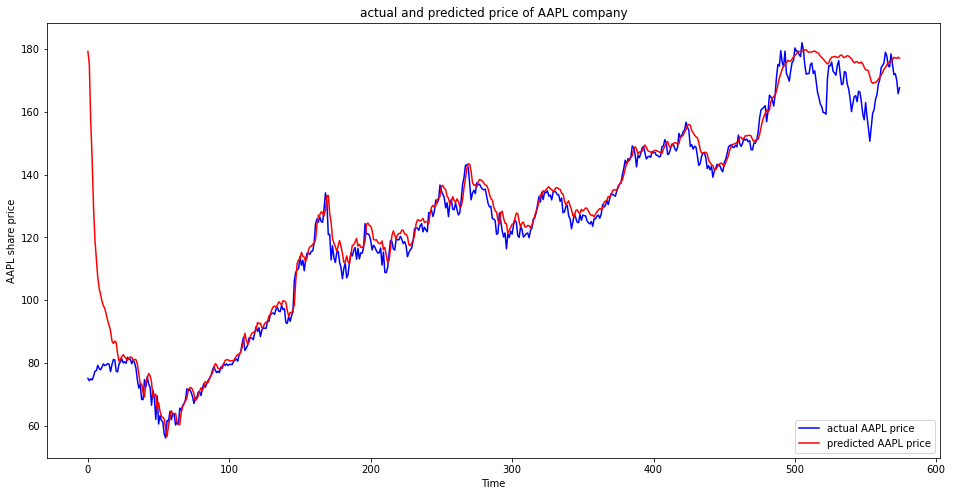

In [1404]:
plt.figure(figsize=(16,8))
plt.plot(actual_price, color='blue', label=f"actual {company} price")
plt.plot(predicted_price, color='red', label=f"predicted {company} price")
plt.title(f"actual and predicted price of {company} company" )
plt.xlabel('Time')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show

# predict the next day

In [1408]:
real_data =[model_inputs[len(model_inputs) + 2 - prediction_days:len(model_inputs +1), 0 ]]

real_data = np.array(real_data)
real_data = np.reshape(real_data,( real_data.shape[0], real_data.shape[1], 1))

real_data.shape

(1, 58, 1)

In [1409]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)



yesterday_data = actual_price[-1]
yesterday_date = dt.datetime.now() - timedelta(days=1)

print(f"Yesterdays Price: {yesterday_data}", yesterday_date)
print(f"Prediction Price: {prediction}", dt.datetime.now())

Yesterdays Price: 167.66000366210938 2022-04-12 11:57:38.803321
Prediction Price: [[176.62662]] 2022-04-13 11:57:38.862513


In [1407]:
'''appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)
new_df = appel_quoto.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
'''

"appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)\nnew_df = appel_quoto.filter(['Close'])\nlast_60_days = new_df[-60:].values\nlast_60_days_scaled = scaler.transform(last_60_days)\nX_test=[]\nX_test.append(last_60_days_scaled)\nX_test = np.array(X_test)\nX_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))\npred_price = model.predict(X_test)\npred_price = scaler.inverse_transform(pred_price)\nprint(pred_price)\n"

In [1369]:
#yesterday = dt.datetime.now() - timedelta(days=1)
#apple_quat2 = web.DataReader('AAPL', 'yahoo', yesterday, test_end)
#yesterday = new_df[-1:]
#print(apple_quat2['Close'])

In [1370]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_115 (LSTM)             (None, 60, 50)            10400     
                                                                 
 dropout_81 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_116 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_82 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_117 (LSTM)             (None, 50)                20200     
                                                                 
 dropout_83 (Dropout)        (None, 50)                0         
                                                                 
 dense_62 (Dense)            (None, 1)               